# 서울글로벌센터 월별 접수유형별 분류별 상담실적
데이터 링크 : http://data.seoul.go.kr/dataList/OA-15739/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

df = pd.read_csv('./서울글로벌센터 월별 접수유형별 분류별 상담실적.csv', encoding='cp949')

In [32]:
df.head()

,년월,대분류,중분류,전화,방문,이메일,게시판,화상상담,이동상담,합계
0,202212,교육,교육기관,12,1,1,0,0,0,15
1,202212,교육,기타,2,3,0,0,0,0,6
2,202212,교육,보육시설,1,0,0,0,0,0,1
3,202212,교육,불편/개선건의,0,0,0,0,0,0,0
4,202212,교육,일반교육,7,1,0,0,0,0,8


In [33]:
def preprocessing(df):
  data = df.copy()
  data['년'] = data['년월'].map(lambda x: str(x)[:4])
  data['월'] = data['년월'].map(lambda x: str(x)[4:6])
  data = data.drop('년월',axis=1)
  return data

data = preprocessing(df)

In [34]:
data.head()

,대분류,중분류,전화,방문,이메일,게시판,화상상담,이동상담,합계,년,월
0,교육,교육기관,12,1,1,0,0,0,15,2022,12
1,교육,기타,2,3,0,0,0,0,6,2022,12
2,교육,보육시설,1,0,0,0,0,0,1,2022,12
3,교육,불편/개선건의,0,0,0,0,0,0,0,2022,12
4,교육,일반교육,7,1,0,0,0,0,8,2022,12


# 시각화
- 년, 월별 상담실적의 변화는?

- 접수유형별 상담실적은?

- 대분류, 중분류별 상담실적은?

- 대분류별 접수유형별 상담실적은?

- 중분류별 접수유형별 상담실적은?

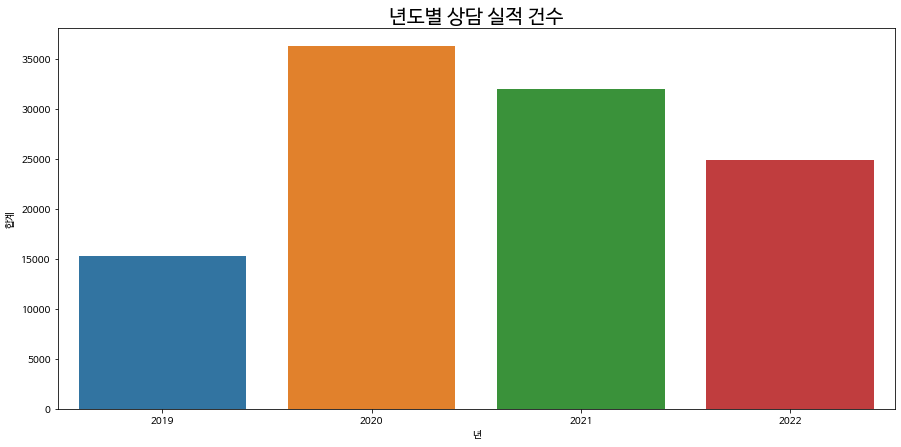

In [247]:
df = data.groupby('년').sum().reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x = df['년'], y = df['합계'])
plt.title('년도별 상담 실적 건수',size=20)
plt.show()

- 2019의 상담실적이 가장 작고, 2020년의 상담실적이 가장 컸으며, 2020 ~ 2022년까지 점차 줄어든다.


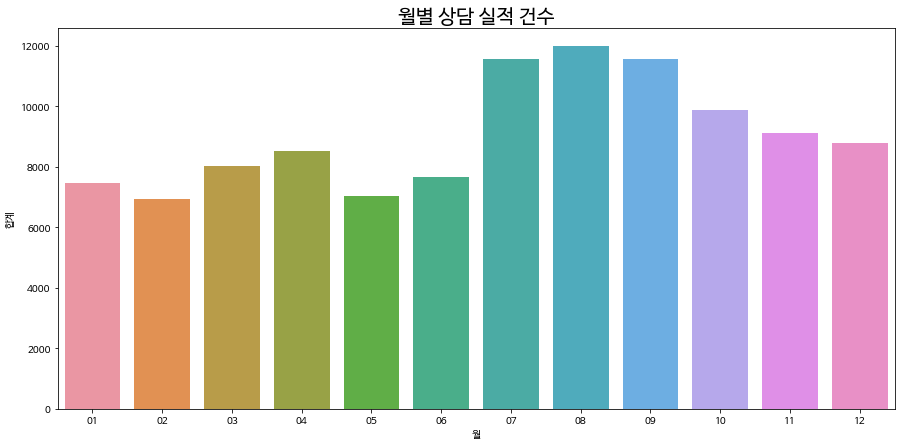

In [37]:
df = data.groupby('월').sum().reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x = df['월'], y = df['합계'])
plt.title('월별 상담 실적 건수',size=20)
plt.show()

- 상반기보다 하반기의 상담실적이 더 컸으며,특히  7,8,9월의 실적이 크다.

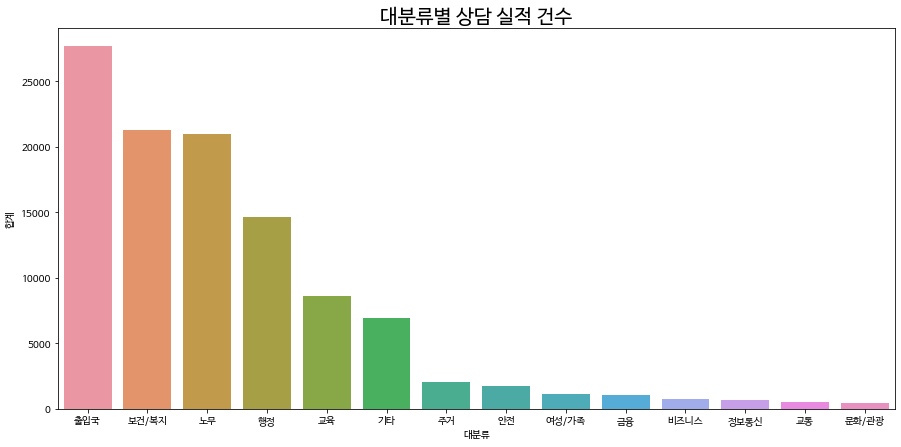

In [40]:
df = data.groupby('대분류').sum().reset_index().sort_values('합계')[::-1]

plt.figure(figsize=(15,7))
sns.barplot(x = df['대분류'], y = df['합계'])
plt.title('대분류별 상담 실적 건수',size=20)
plt.show()

- 출입국, 보건/복지, 노무, 행정 순으로 실적 건수가 크게 나타났다.

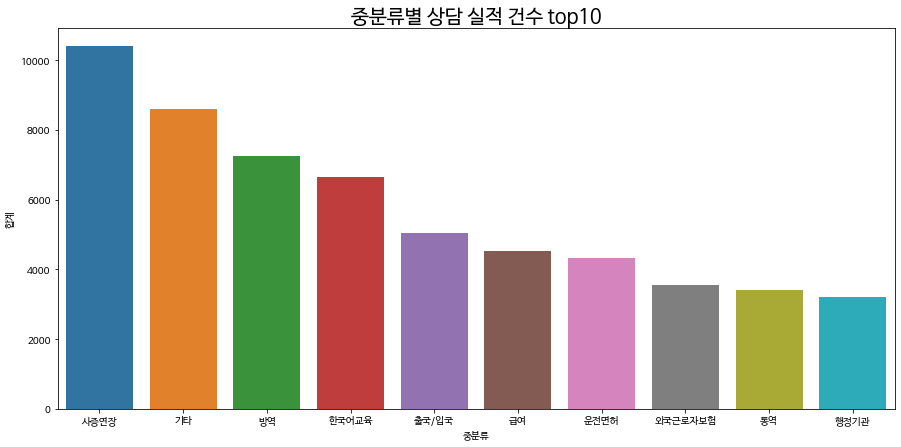

In [248]:
df = data.groupby('중분류').sum().reset_index().sort_values('합계')[::-1][:10]

plt.figure(figsize=(15,7))
sns.barplot(x = df['중분류'], y = df['합계'])
plt.title('중분류별 상담 실적 건수 top10',size=20)
plt.show()

- 중분류 실적 top10을 살펴보면 사증연장이 가장 컸으며, 이는 대분류의 1위로 나타난 출입국과 관련이 있다.
- 이후 방역, 한국어교육 등 실적이 많았던 대분류와 관련된 중분류들이 top10을 보이고 있다.
- 기타의 경우 모든 기타 상담들이 한꺼번에 포함되어서 높게 나타난 것으로 보인다.

In [224]:
def pie_plot(frequency,labels,palette,title):
  labels_frequency = zip(labels,frequency,palette) 
  labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)

  sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
  sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
  sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
  
  # 0값이 있는 경우 제거
  while 0 in sorted_frequency:
    idx = sorted_frequency.index(0)
    sorted_frequency.pop(idx)
    sorted_labels.pop(idx)
  
  fig = plt.figure(figsize=(30,10)) ## 캔버스 생성
  ax = fig.add_subplot() ## 프레임 생성
    
  ## 파이차트 출력
  pie = ax.pie(sorted_frequency,
               startangle=90, 
               counterclock=False, 
               colors = sorted_colors, 
               wedgeprops=wedgeprops
              )
  
  total = np.sum(frequency) ## 빈도수 합
  
  threshold = 5
  sum_pct = 0 ## 퍼센티지
  count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
  spacing = 0.1 # 텍스트 사이의 간격

  for i,l in enumerate(sorted_labels):
      ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
      center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표, 반지름
      
      ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
      if sorted_frequency[i]/total*100 < threshold:
          x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
          count_less_5pct += 1
      else:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
      
      ## 퍼센티지 출력
      if i < len(labels) - 1:
          sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
          ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=15)
      else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
          ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=15)
  
  plt.legend(pie[0],sorted_labels,fontsize=15) ## 범례
  plt.title(title,size=20)
  plt.show()

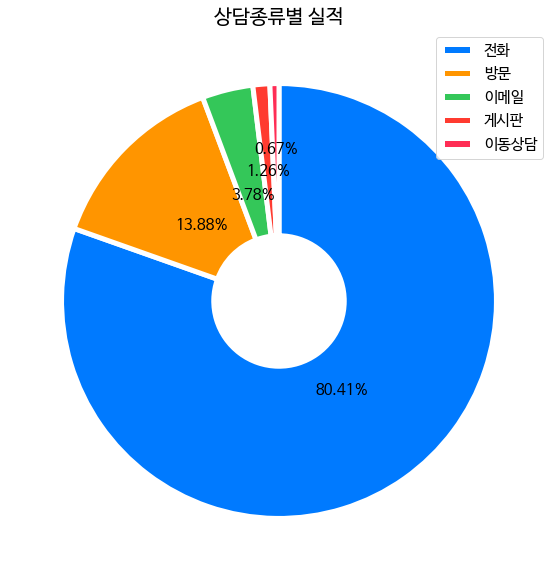

In [239]:
# 상담 종류별 실적
pie_plot(data.sum().iloc[2:8],data.columns[2:8],light_palette,'상담종류별 실적')

- 상담 종류는 전화상담이 80.41%로 가장 많았으며, (이메일, 게시판, 이동상담)은 5% 미만으로 매우 낮은 비율을 보였다.
- 코로나 시기인만큼 비대면 상담의 비율이 높았다.

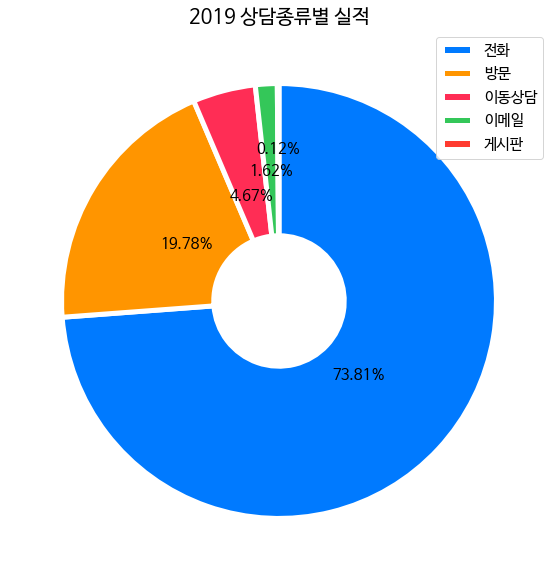

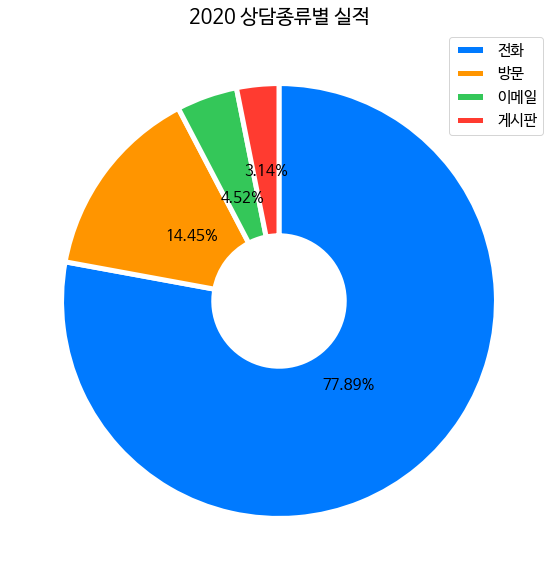

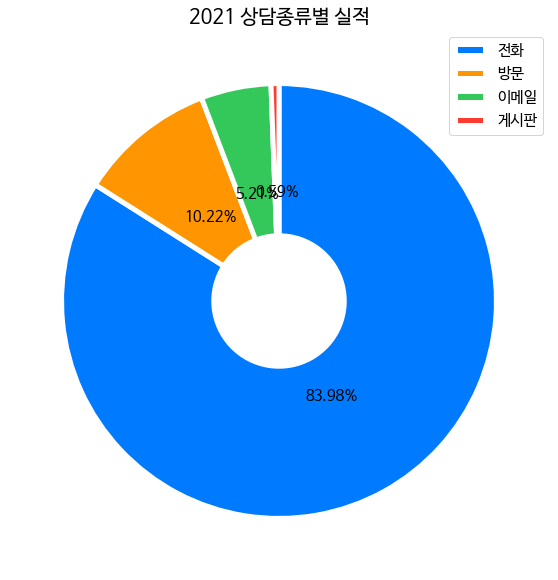

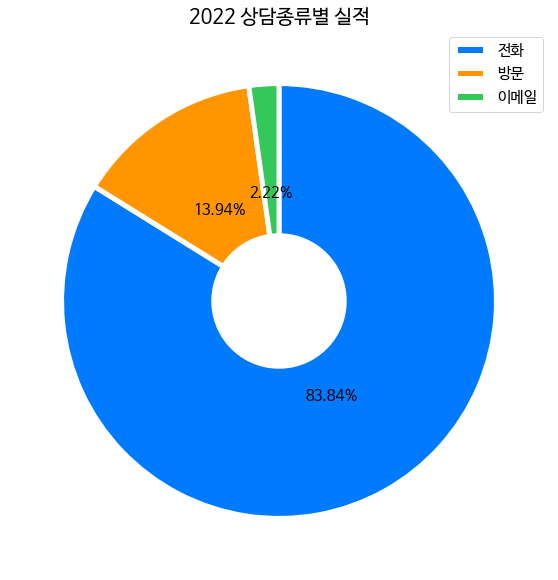

In [251]:
# 년도별 상담종류별 실적
df = data.groupby('년').sum()

for i in range(len(df.index)):
  pie_plot(df.iloc[i,:6],df.columns[:6],light_palette,f'{df.index[i]} 상담종류별 실적')

- 시간이 흐를수록 전화 상담의 비중이 높아지고 있다.
- 이동상담의 경우 2019년에만 존재하였으며, 게시판은 2022년에 단 한건도 존재하지 않았다.

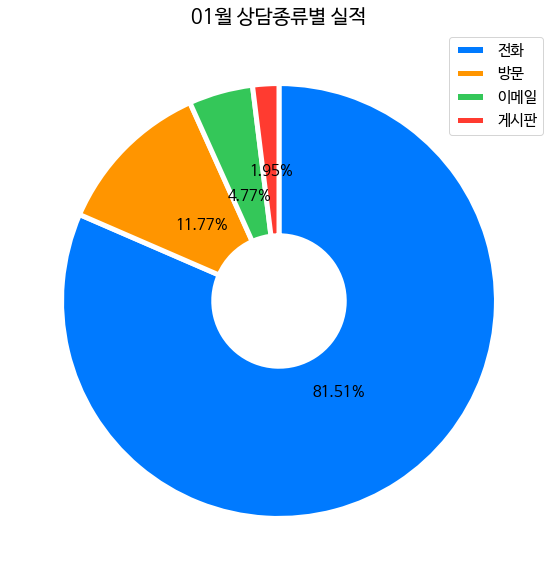

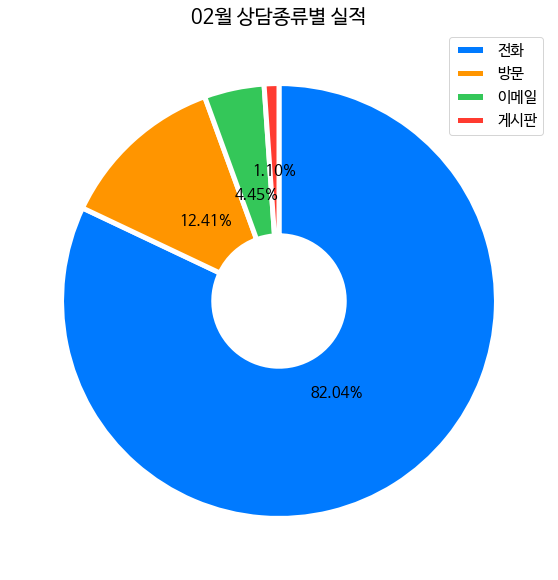

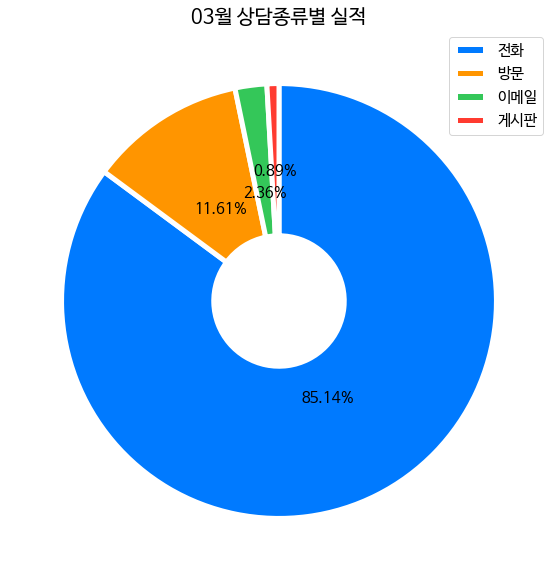

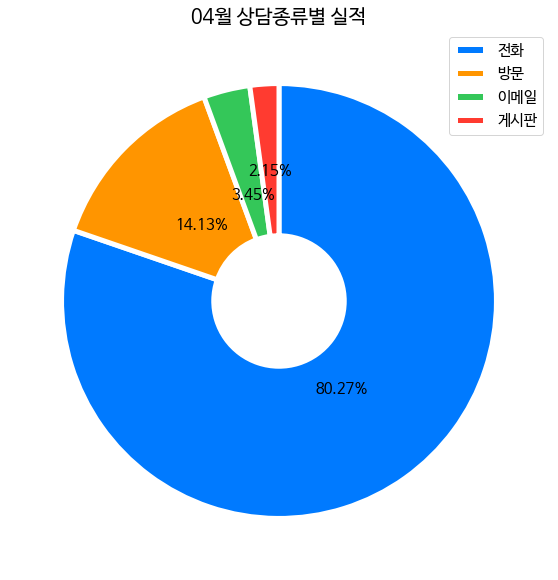

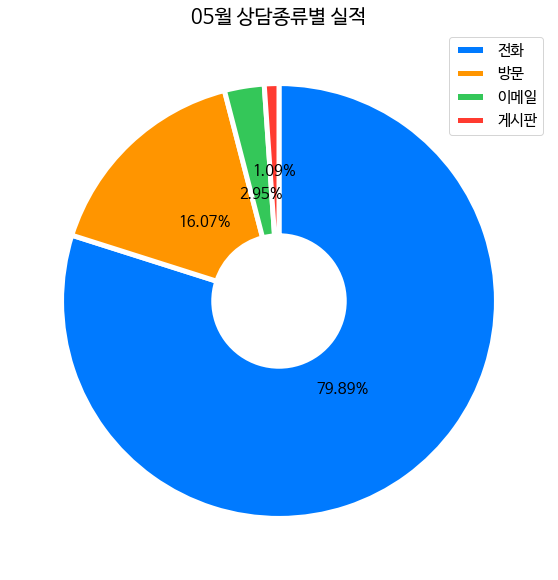

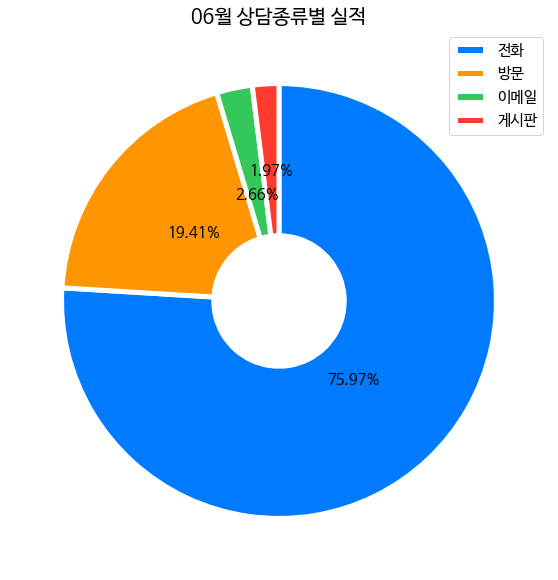

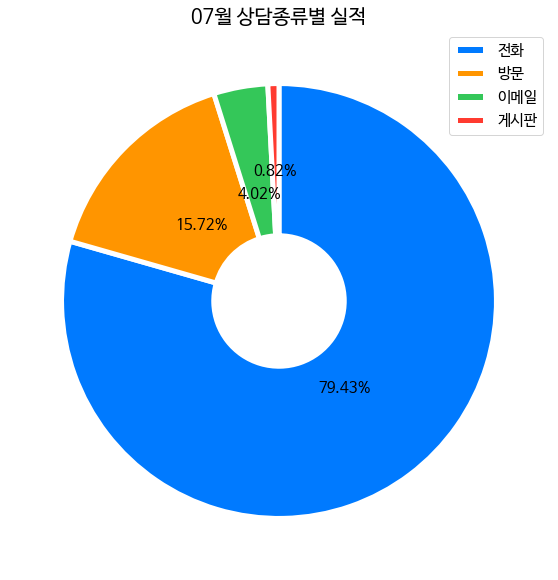

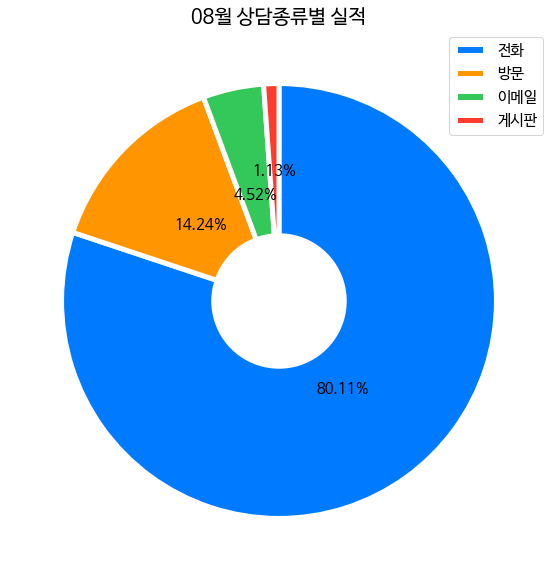

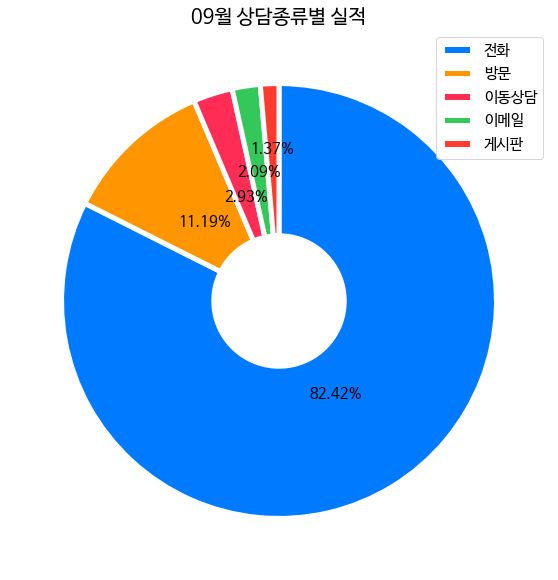

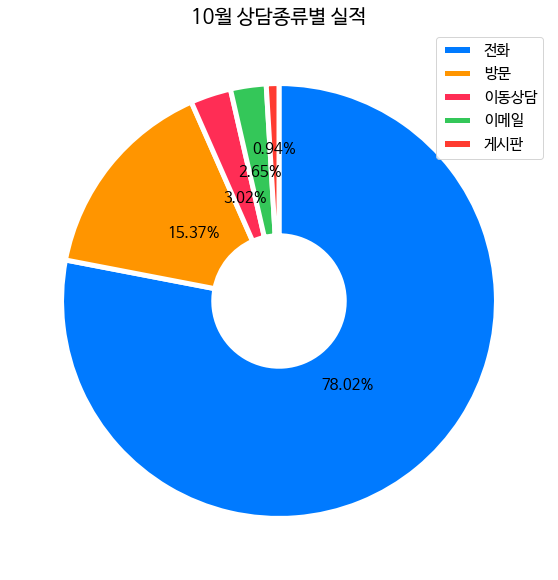

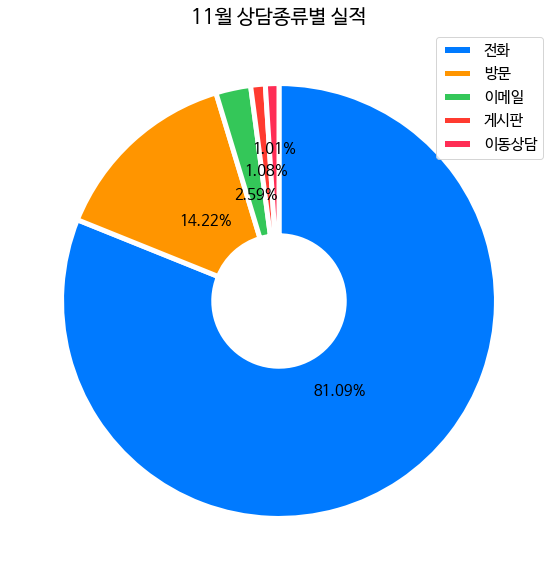

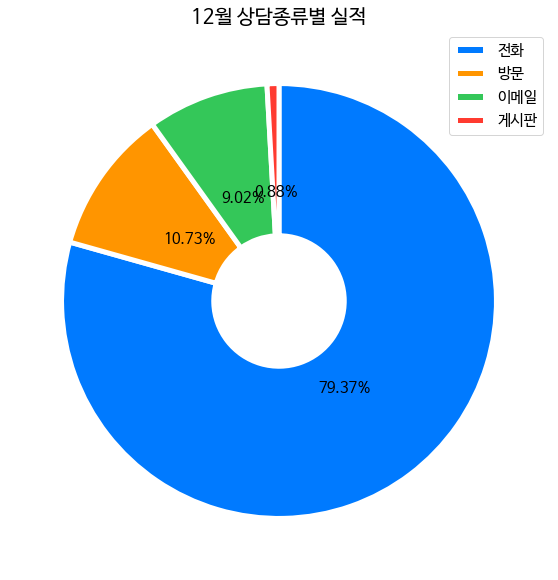

In [252]:
# 월별 상담종류별 실적
df = data.groupby('월').sum()

for i in range(len(df.index)):
  pie_plot(df.iloc[i,:6],df.columns[:6],light_palette,f'{df.index[i]}월 상담종류별 실적')

- 9,10,11월에만 이동상담이 존재하였다.

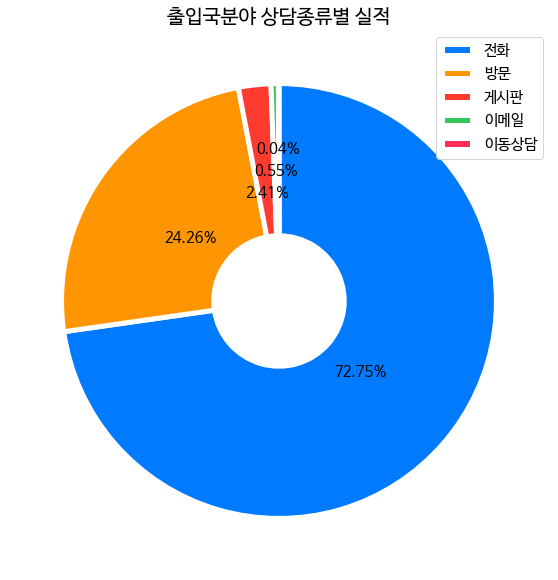

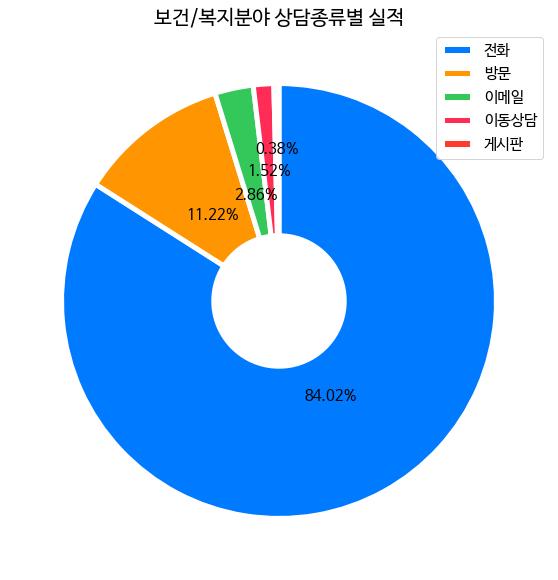

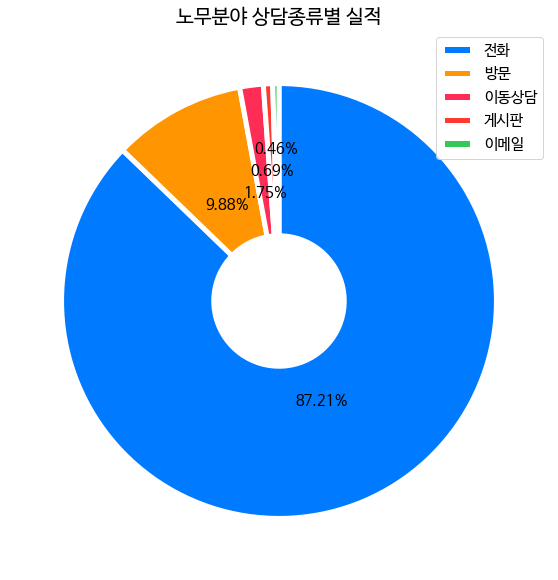

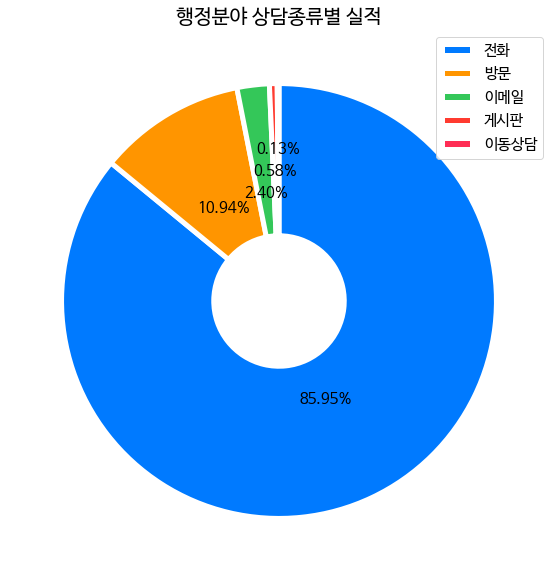

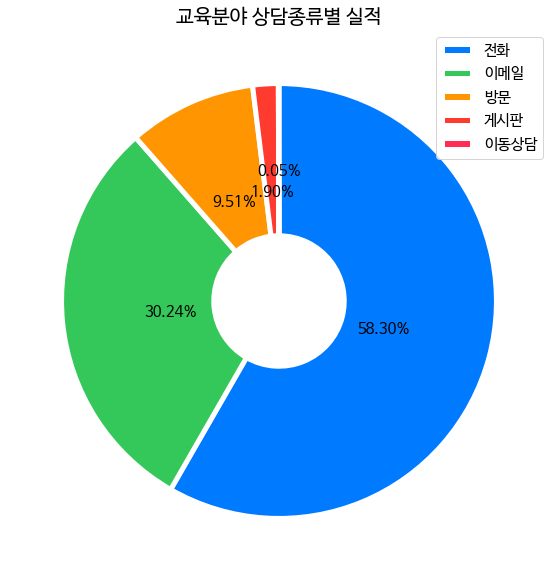

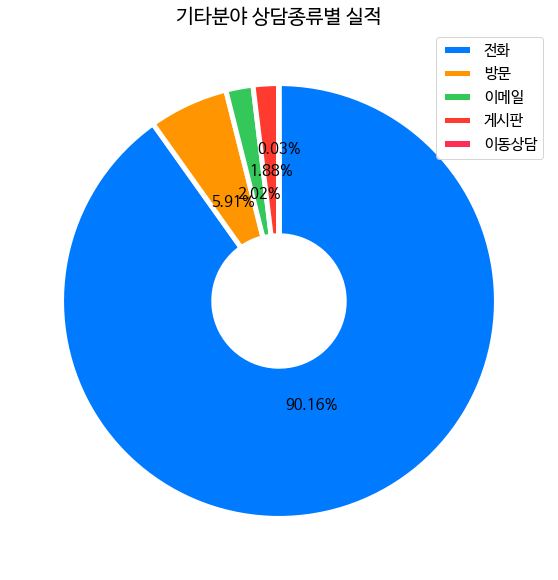

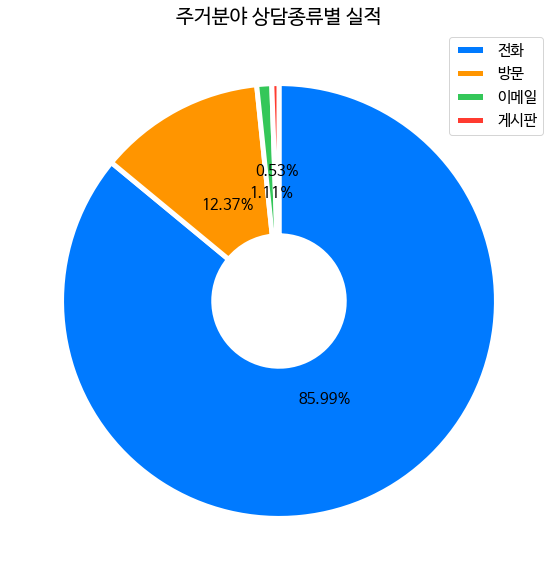

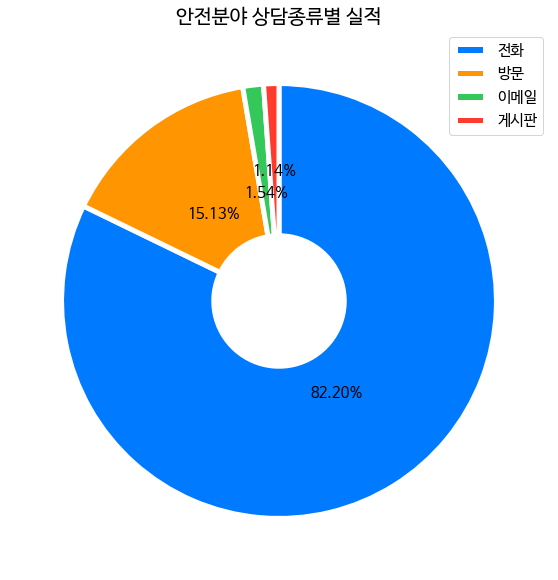

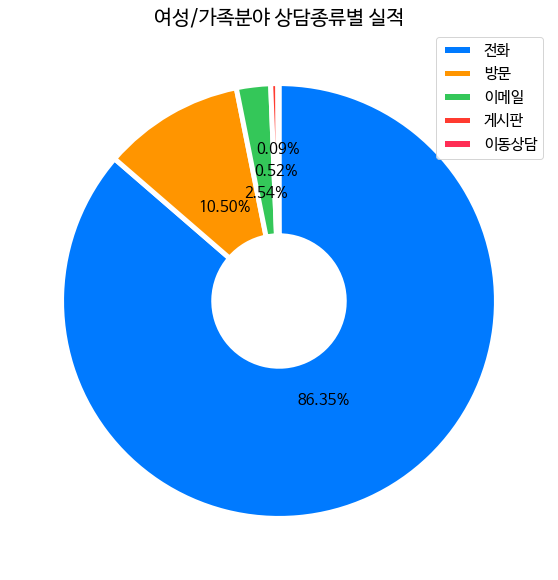

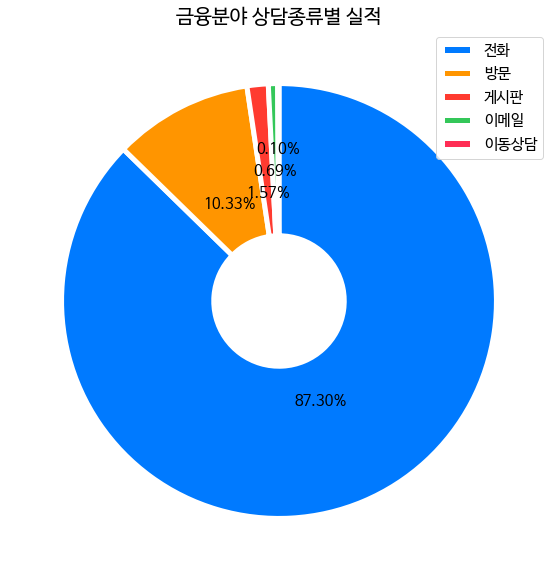

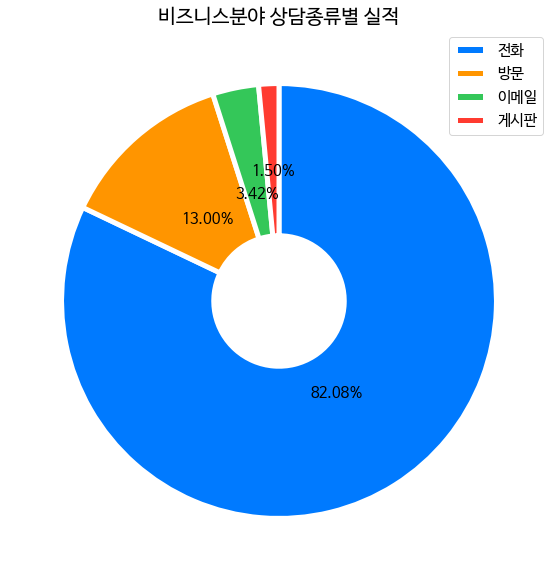

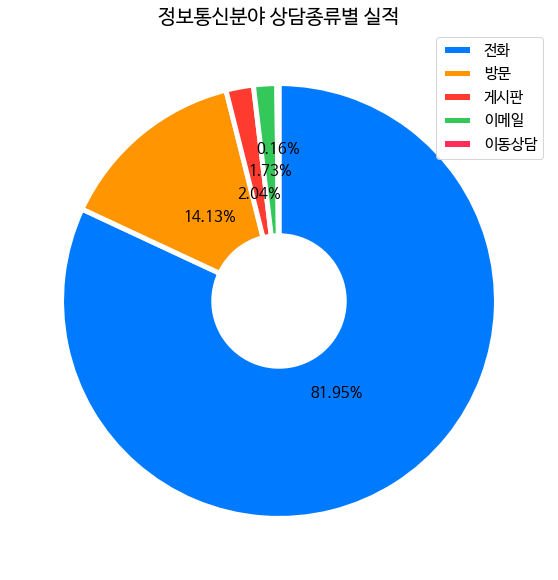

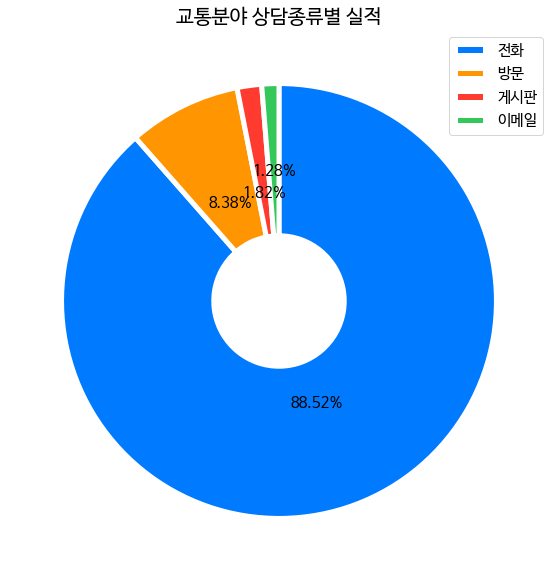

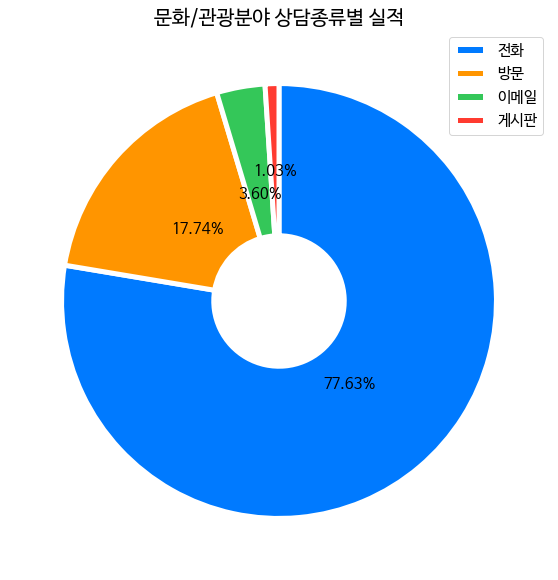

In [257]:
# 대분류별 상담종류별 실적
df = data.groupby('대분류').sum().sort_values('합계')[::-1]

for i in range(len(df.index)):
  pie_plot(df.iloc[i,:6],df.columns[:6],light_palette,f'{df.index[i]}분야 상담종류별 실적')

- 교육분야의 경우 이메일 상담 비율이 약 30%를 보이며 다른 분야에 비해 높았다.
  - 여러 교육기관들은 이메일이 잘 활성화 되어 있기 때문에 높은 것으로 생각된다. 

- 출입국분야의 경우 방문 상담 비율이 약 24%를 보이며 평균 10%대를 보이는 다른 분야들에 비해 높았다.
  - 사증의 경우 복잡한 절차로 비대면으로는 소통하기 어려울 것으로 예상되기 때문에 방문상담을 원하는 사람이 많았을 것이라 생각된다.

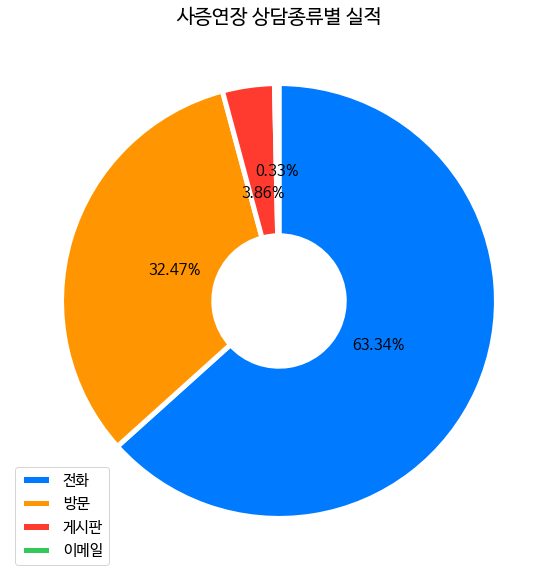

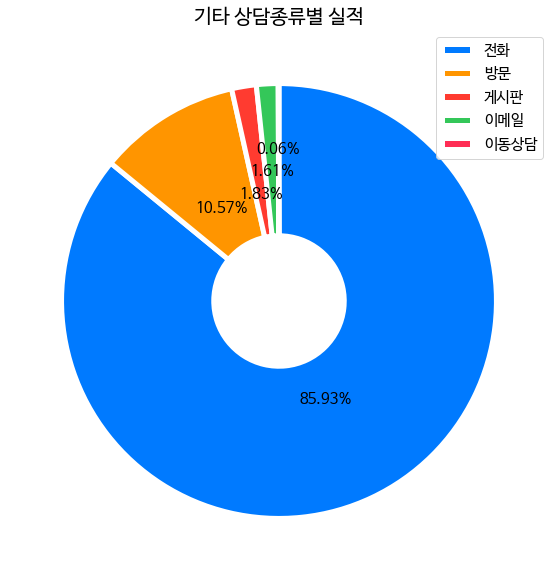

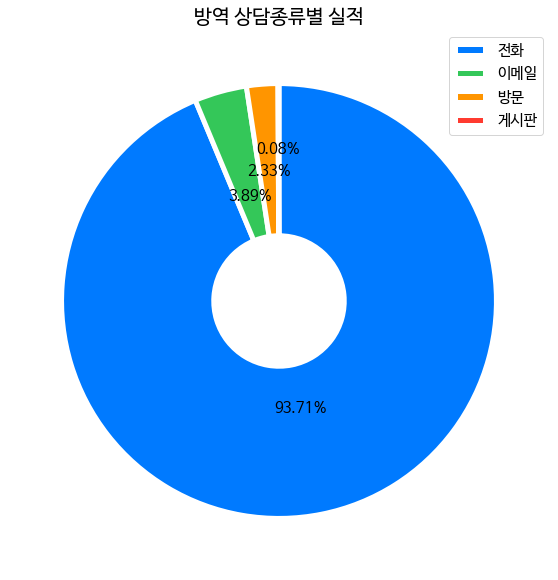

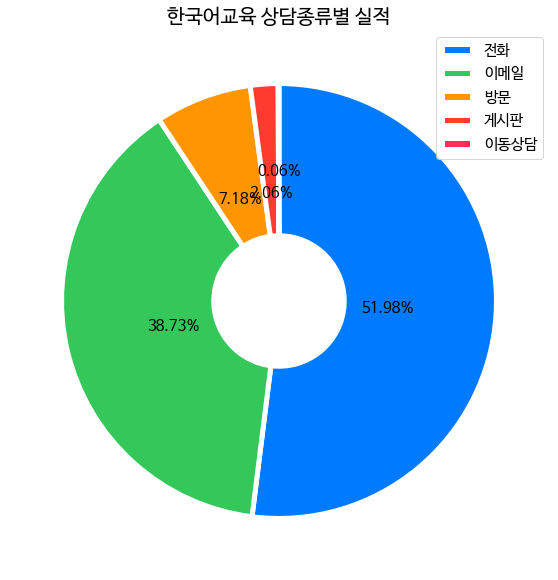

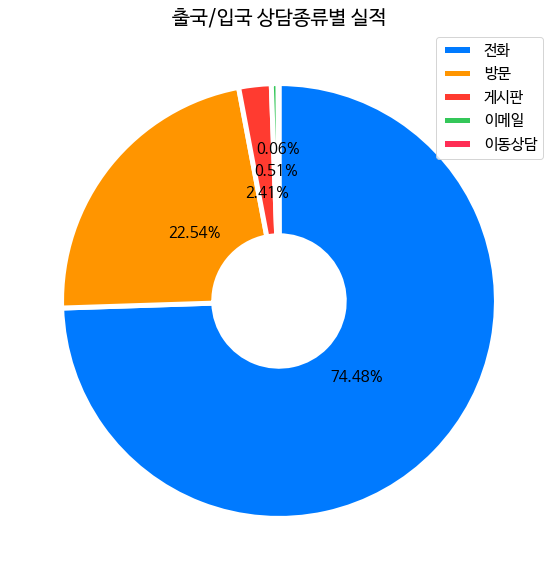

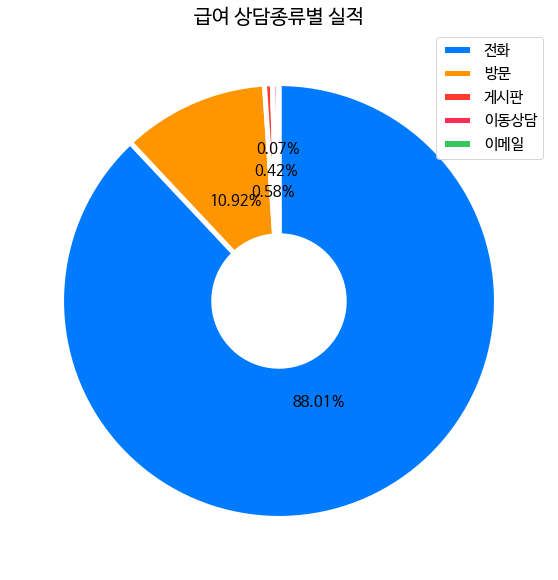

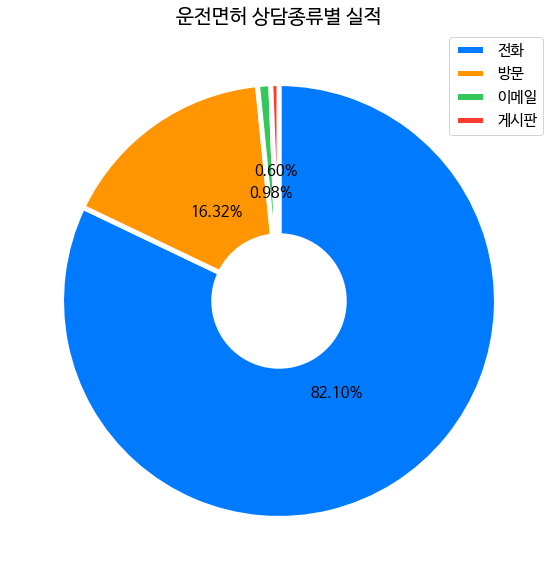

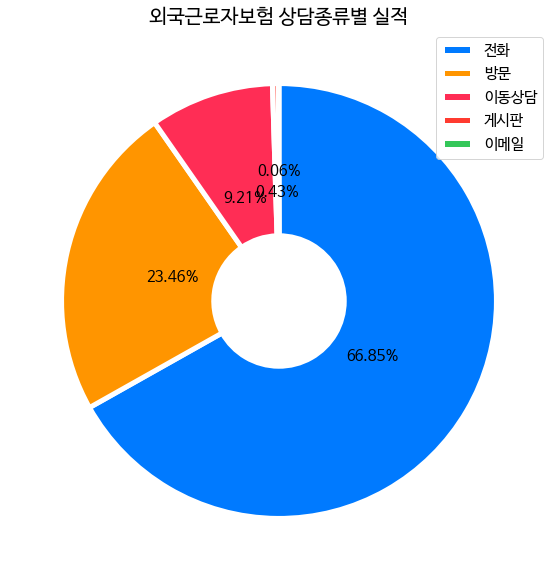

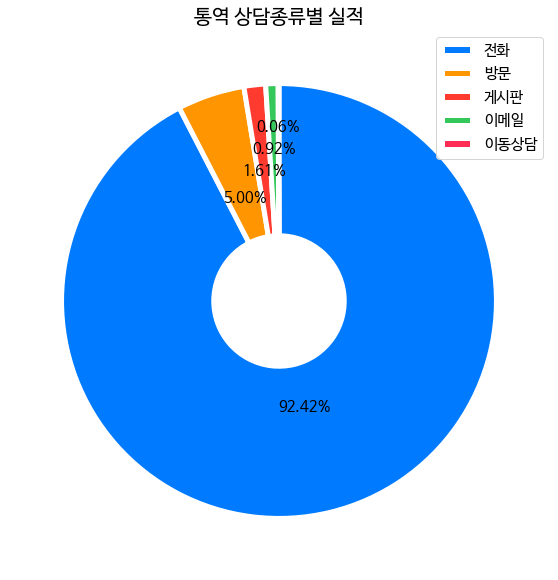

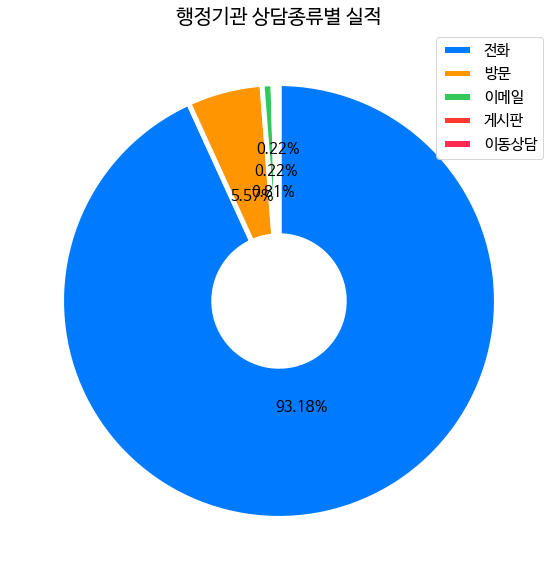

In [254]:
# 중분류별 상담종류별 실적
df = data.groupby('중분류').sum().sort_values('합계')[::-1][:10]

for i in range(len(df.index)):
  pie_plot(df.iloc[i,:6],df.columns[:6],light_palette,f'{df.index[i]} 상담종류별 실적')

- 사증 연장,출국/입국은 방문상담 비율이 각각 32.47% , 22.54%로 다른 중분류들에 비해 높게 나타났다.
  - 대한민국의 체류와 관련된 분류에서 방문상담비율이 높게 나타나는 것을 볼 수 있다.

- 방역은 방문상담이 0.08%로 비대면상담이 대부분이었다.
  - 질병 감염 가능성이 있기 때문이라고 생각된다.

- 한국어교육분야에서는 이메일이 38.73%로 다른 중분류들에 비해 높게 나타났다.
- 외국인근로자보험에서는 이동상담의 비율이 9%로 높게 나타났다.